In [1]:
import warnings
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", RuntimeWarning)

In [1]:
# cargar palantir
import pandas as pd
import scanpy as sc
import anndata as ad
import muon as mu
import mudata as md
from mudata import MuData
import palantir
import scanpy as sc
import pandas as pd
import os

# Plotting
import matplotlib
import matplotlib.pyplot as plt

# warnings
import warnings
from numba.core.errors import NumbaDeprecationWarning

warnings.filterwarnings(action="ignore", category=NumbaDeprecationWarning)
warnings.filterwarnings(
    action="ignore", module="scanpy", message="No data for colormapping"
)

# Inline plotting
%matplotlib inline

In [2]:
# Cargar el archivo MuData
mdata_file = "/data/scratch/LAB/enric/Proyecto_pitagoras/Analisis_pitagoras/Results/05_datos_integrados/mudata_harmony_conTCR_KNN_leiden.h5mu"
mdata = mu.read(mdata_file)

/home/evercher/miniforge3/envs/palantir/lib/python3.10/site-packages/anndata/utils.py:349: ExperimentalFeatureWarning: Support for Awkward Arrays is currently experimental. Behavior may change in the future. Please report any issues you may encounter!
  warnings.warn(msg, category, stacklevel=stacklevel)
/home/evercher/miniforge3/envs/palantir/lib/python3.10/site-packages/mudata/_core/mudata.py:1531: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("var", axis=0, join_common=join_common)
/home/evercher/miniforge3/envs/palantir/lib/python3.10/site-packages/mudata/_core/mudata.py:1429: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_upd

In [3]:
# Extraer el objeto AnnData correspondiente a 'gex'
adata_gex = mdata.mod['gex']

In [5]:
# Suponiendo que 'adata_gex' es tu objeto AnnData
adata_gex.write_h5ad("/data/scratch/LAB/enric/Proyecto_pitagoras/Analisis_pitagoras/Results/05_datos_integrados/adata_harmony_KNN_leiden.h5ad")

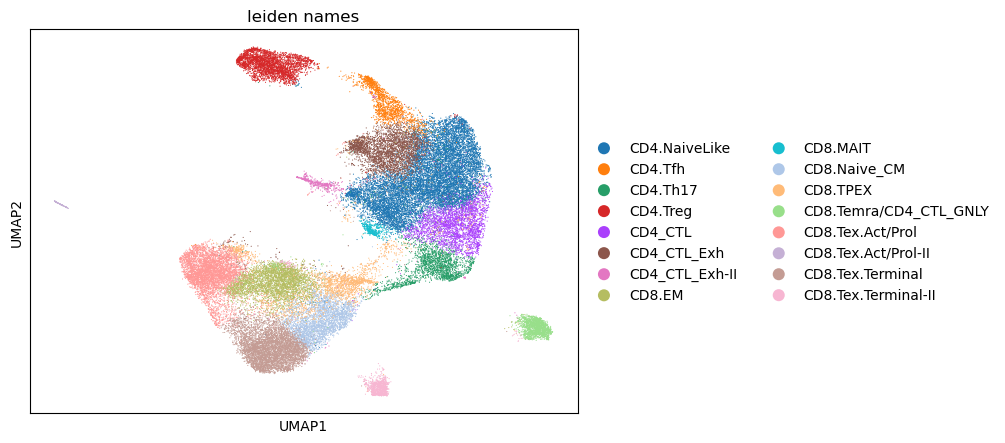

In [15]:
sc.pl.scatter(adata_gex, basis="umap", color="leiden_names")

In [16]:
sc.tl.diffmap(adata_gex)

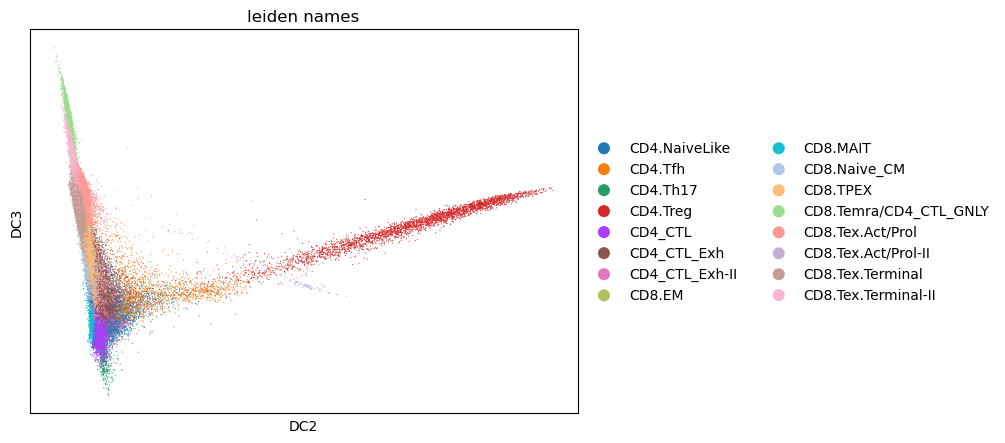

In [30]:
root_ixs = adata_gex.obsm["X_diffmap"][:, 3].argmin()
sc.pl.scatter(
    adata_gex,
    basis="diffmap",
    color=["leiden_names"],
    components=[2,3],
)

adata_gex.uns["iroot"] = root_ixs

In [17]:
sc.tl.dpt(adata_gex)

In [18]:
adata_gex

AnnData object with n_obs × n_vars = 49043 × 23209
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'prediction', 'doublet', 'doublet_filtered', 'Sample', 'n_genes', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'ATLAS_TIL_KNN', 'ATLAS_TIL_score', 'Celltypist', 'Celltypist_score', 'leiden', 'leiden_names', 'dpt_pseudotime'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'leiden_names_colors', 'diffmap_evals', 'iroot'
    obsm: 'X_pca_harmony', 'X_umap', 'X_diffmap'
    layers: 'counts_soupx_crude', 'original_counts'
    obsp: 'connectivities', 'distances'

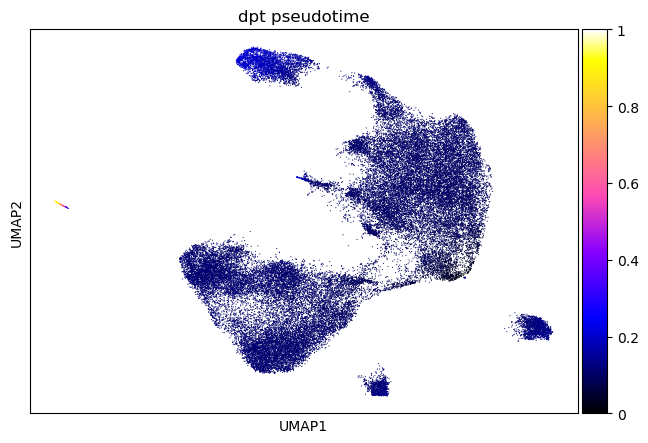

In [20]:
sc.pl.scatter(
    adata_gex,
    basis="umap",
    color=["dpt_pseudotime"],
    color_map="gnuplot2",
)

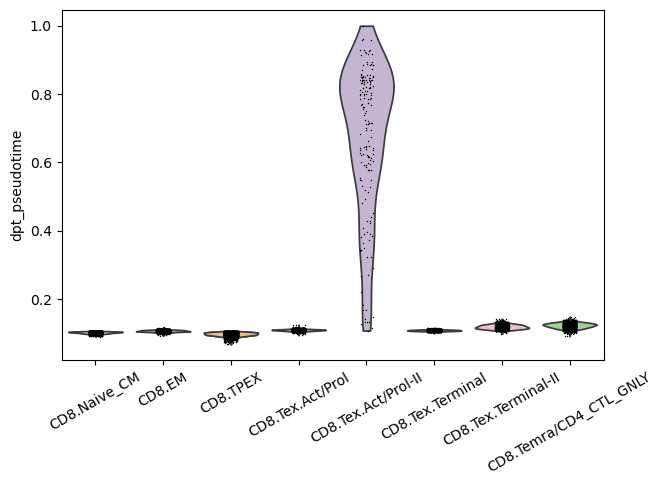

In [26]:
sc.pl.violin(
    adata_gex,
    keys=["dpt_pseudotime"],
    groupby="leiden_names",
    rotation=30,
    order=[
        "CD8.Naive_CM",
        "CD8.EM",
        "CD8.TPEX",
        "CD8.TPEX",
        "CD8.Tex.Act/Prol",
        "CD8.Tex.Act/Prol-II",
        "CD8.Tex.Terminal",
        "CD8.Tex.Terminal-II",
        "CD8.Temra/CD4_CTL_GNLY",
    ],
)

## Vamos a probar con Palantir:

In [3]:
# Cargar el archivo MuData
mdata_file = "/data/scratch/LAB/enric/Proyecto_pitagoras/Analisis_pitagoras/Results/05_datos_integrados/mudata_harmony_conTCR_KNN_leiden.h5mu"
mdata = mu.read(mdata_file)

/home/evercher/miniforge3/envs/palantir/lib/python3.10/site-packages/anndata/utils.py:349: ExperimentalFeatureWarning: Support for Awkward Arrays is currently experimental. Behavior may change in the future. Please report any issues you may encounter!
  warnings.warn(msg, category, stacklevel=stacklevel)


In [5]:
adata_gex = mdata.mod['gex']

In [6]:
sc.pp.highly_variable_genes(adata_gex, n_top_genes=1500,flavor='cell_ranger')

In [7]:
# Run diffusion maps
dm_res = palantir.utils.run_diffusion_maps(adata_gex, n_components=5,pca_key="X_pca_harmony")

In [8]:
ms_data = palantir.utils.determine_multiscale_space(adata_gex)

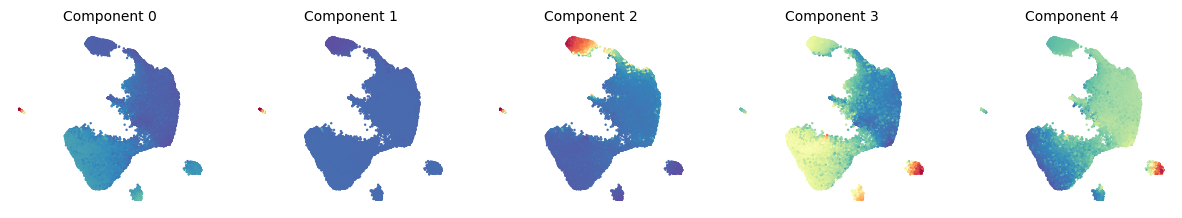

In [9]:
palantir.plot.plot_diffusion_components(adata_gex)
plt.show()

In [21]:
# Actualizar los estados terminales
terminal_cells = {
    #"CD8.Tex.Act/Prol": "ACACCGGCAGTGGAGT-1_PT14",
    #"CD8.Tex.Terminal": "ACAGCTAGTCCAACTA-1_PT14",
    "CD8.Tex.Act/Prol-II": "TCGCGTTGTGTGACGA-1_PT14",
    "CD8.Tex.Terminal-II": "GAATAAGAGATGTTAG-1_PT49",
}

# Crear terminal_states con los estados terminales actualizados
terminal_states = pd.Series(
    list(terminal_cells.keys()),  # Nombres de los estados terminales
    index=list(terminal_cells.values()),  # IDs de las células terminales
)

print("Estados terminales actualizados:")
print(terminal_states)

Estados terminales actualizados:
TCGCGTTGTGTGACGA-1_PT14    CD8.Tex.Act/Prol-II
GAATAAGAGATGTTAG-1_PT49    CD8.Tex.Terminal-II
dtype: object


In [22]:
# Definir células iniciales a partir de ATLAS_TIL
start_cells = {
    "CD8.NaiveLike": "TCGGGACAGGCGATAC-1_PT20",
    "CD4.NaiveLike": "AACACGTCACCGGAAA-1_PT14",
}

print("Células iniciales actualizadas:")
print(start_cells)

Células iniciales actualizadas:
{'CD8.NaiveLike': 'TCGGGACAGGCGATAC-1_PT20', 'CD4.NaiveLike': 'AACACGTCACCGGAAA-1_PT14'}


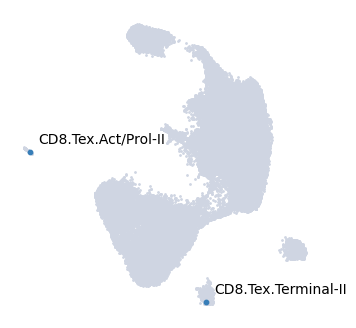

In [23]:
palantir.plot.highlight_cells_on_umap(adata_gex, terminal_states)
plt.show()

In [24]:
start_cell = "TCGGGACAGGCGATAC-1_PT20"
pr_res = palantir.core.run_palantir(
    adata_gex, start_cell, num_waypoints=500, terminal_states=terminal_states
)

Sampling and flocking waypoints...
Time for determining waypoints: 0.0700367530186971 minutes
Determining pseudotime...
Shortest path distances using 30-nearest neighbor graph...
Time for shortest paths: 0.36279003620147704 minutes
Iteratively refining the pseudotime...
Correlation at iteration 1: 1.0000
Entropy and branch probabilities...
Markov chain construction...
Computing fundamental matrix and absorption probabilities...
Project results to all cells...


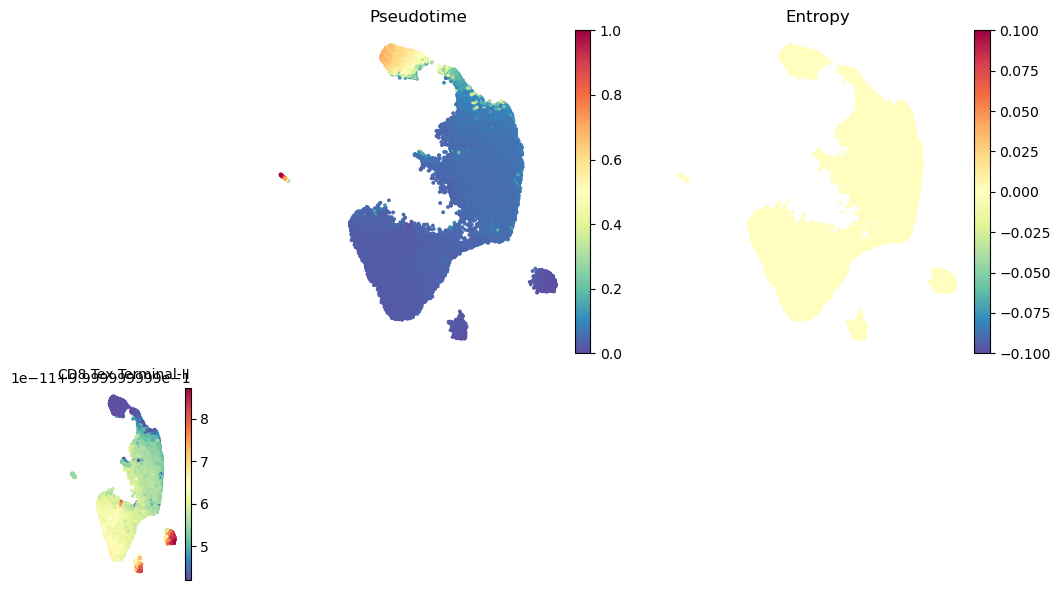

In [20]:
palantir.plot.plot_palantir_results(adata_gex, s=3)
plt.show()

## Monocle3

In [6]:
import os
import h5py
import numpy as np
import pandas as pd
from scipy import sparse
from matplotlib import pyplot as plt
from py_monocle import (
    learn_graph,
    order_cells,
    compute_cell_states,
    regression_analysis,
    differential_expression_genes,
)


In [7]:
# Ruta al archivo .h5ad
file_path = "/data/scratch/LAB/enric/Proyecto_pitagoras/Analisis_pitagoras/Results/05_datos_integrados/adata_harmony_KNN_leiden.h5ad"

# Cargar el archivo
adata_gex = ad.read_h5ad(file_path)

Voy a separar por CD4 y CD8:

In [28]:
# Filtrar células CD8
cd8_cells = adata_gex[adata_gex.obs['ATLAS_TIL_KNN'].str.startswith('CD8.')]

In [29]:
cd8_cells

View of AnnData object with n_obs × n_vars = 20998 × 23209
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'prediction', 'doublet', 'doublet_filtered', 'Sample', 'n_genes', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'ATLAS_TIL_KNN', 'ATLAS_TIL_score', 'Celltypist', 'Celltypist_score', 'leiden', 'leiden_names'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors'
    obsm: 'X_pca_harmony', 'X_umap'
    layers: 'counts_soupx_crude', 'original_counts'
    obsp: 'connectivities', 'distances'

In [30]:
# Filtrar células CD4
cd4_cells = adata_gex[adata_gex.obs['ATLAS_TIL_KNN'].str.startswith('CD4.')]

In [31]:
cd4_cells

View of AnnData object with n_obs × n_vars = 28045 × 23209
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'prediction', 'doublet', 'doublet_filtered', 'Sample', 'n_genes', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'ATLAS_TIL_KNN', 'ATLAS_TIL_score', 'Celltypist', 'Celltypist_score', 'leiden', 'leiden_names'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors'
    obsm: 'X_pca_harmony', 'X_umap'
    layers: 'counts_soupx_crude', 'original_counts'
    obsp: 'connectivities', 'distances'

In [15]:
from scipy.sparse import csr_matrix
# Datos UMAP desde adata_gex (coordenadas de reducción dimensional)
umap = adata_gex.obsm["X_umap"]

# Clústeres (pueden ser Leiden o cualquier agrupación definida)
leiden = adata_gex.obs["leiden"].astype(int).values

# Matriz de expresión (en formato disperso para optimización)
expression_matrix = csr_matrix(adata_gex.X)

# Barcodes (índices de las células)
barcodes = adata_gex.obs_names.tolist()

# Features / genes de los datos
features = adata_gex.var_names.tolist()

Learn the trajectory graph

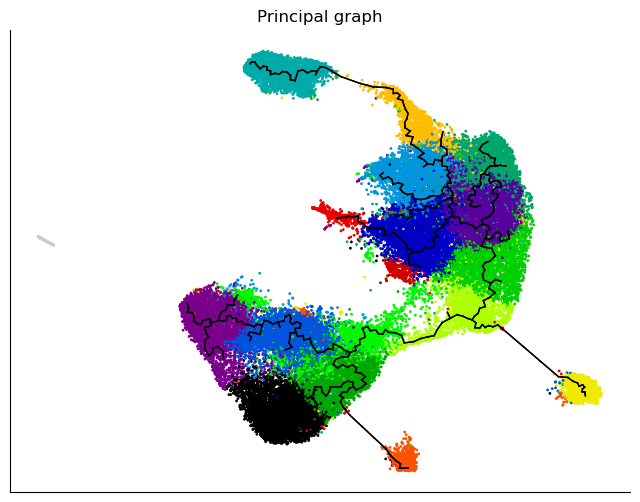

In [16]:
# Aprender el grafo de trayectorias
projected_points, mst, centroids = learn_graph(matrix=umap, clusters=leiden)

# Dibujar el grafo de trayectorias
plt.figure(1, (8, 6))
plt.title("Principal graph")
plt.scatter(umap[:, 0], umap[:, 1], c=louvain, s=1, cmap="nipy_spectral")

# Añadir aristas del grafo generado
edges = np.array(mst.nonzero()).T
for edge in edges:
    plt.plot(centroids[edge, 0], centroids[edge, 1], c="black", linewidth=1)
plt.xticks([])
plt.yticks([])
plt.show()

In [32]:
# Datos para CD8
umap_cd8 = cd8_cells.obsm["X_umap"]
leiden_cd8 = cd8_cells.obs["leiden"].astype(int).values
expression_matrix_cd8 = csr_matrix(cd8_cells.X)
barcodes_cd8 = cd8_cells.obs_names.tolist()
features_cd8 = cd8_cells.var_names.tolist()

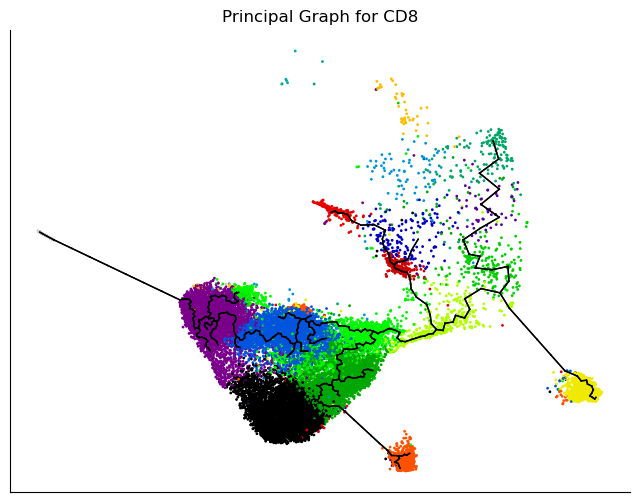

In [35]:
# Aprender y visualizar el grafo de trayectorias para CD8
projected_points_cd8, mst_cd8, centroids_cd8 = learn_graph(matrix=umap_cd8, clusters=leiden_cd8)

# Dibujar el grafo de trayectorias para CD8
plt.figure(1, (8, 6))
plt.title("Principal Graph for CD8")
plt.scatter(umap_cd8[:, 0], umap_cd8[:, 1], c=leiden_cd8, s=1, cmap="nipy_spectral")

# Añadir aristas del grafo generado para CD8
edges_cd8 = np.array(mst_cd8.nonzero()).T
for edge in edges_cd8:
    plt.plot(centroids_cd8[edge, 0], centroids_cd8[edge, 1], c="black", linewidth=1)
plt.xticks([])
plt.yticks([])
plt.show()

In [33]:
# Datos para CD4
umap_cd4 = cd4_cells.obsm["X_umap"]
leiden_cd4 = cd4_cells.obs["leiden"].astype(int).values
expression_matrix_cd4 = csr_matrix(cd4_cells.X)
barcodes_cd4 = cd4_cells.obs_names.tolist()
features_cd4 = cd4_cells.var_names.tolist()

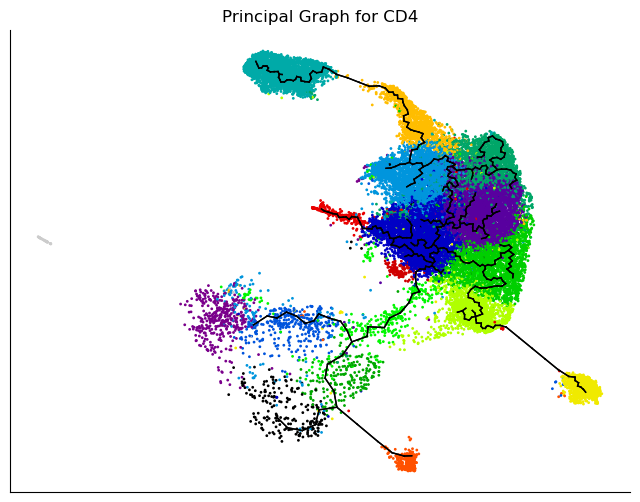

In [36]:
# Aprender y visualizar el grafo de trayectorias para CD4
projected_points_cd4, mst_cd4, centroids_cd4 = learn_graph(matrix=umap_cd4, clusters=leiden_cd4)

# Dibujar el grafo de trayectorias para CD4
plt.figure(2, (8, 6))
plt.title("Principal Graph for CD4")
plt.scatter(umap_cd4[:, 0], umap_cd4[:, 1], c=leiden_cd4, s=1, cmap="nipy_spectral")

# Añadir aristas del grafo generado para CD4
edges_cd4 = np.array(mst_cd4.nonzero()).T
for edge in edges_cd4:
    plt.plot(centroids_cd4[edge, 0], centroids_cd4[edge, 1], c="black", linewidth=1)
plt.xticks([])
plt.yticks([])
plt.show()

Pseudotime

In [24]:
barcode_to_find = "TCGGGACAGGCGATAC-1_PT20"

# Imprimir algunos barcodes para verificar el formato
print(barcodes[:10])  # Imprime los primeros 10 barcodes

# Buscar el barcode ignorando espacios en blanco adicionales
stripped_barcodes = [bc.strip() for bc in barcodes]

if barcode_to_find in stripped_barcodes:
    root_cell_index = stripped_barcodes.index(barcode_to_find)
    print(f"Root cell index: {root_cell_index}")
else:
    print(f"Barcode '{barcode_to_find}' not found in barcodes list.")

['AAACCTGAGAAGAAGC-1_PT14', 'AAACCTGAGGACAGAA-1_PT14', 'AAACCTGAGTGGAGTC-1_PT14', 'AAACCTGAGTGTCTCA-1_PT14', 'AAACCTGCAAACTGTC-1_PT14', 'AAACCTGCACAGCCCA-1_PT14', 'AAACCTGCAGACGCCT-1_PT14', 'AAACCTGCATCACGAT-1_PT14', 'AAACCTGGTAAGGGAA-1_PT14', 'AAACCTGGTCATATCG-1_PT14']
Root cell index: 16463


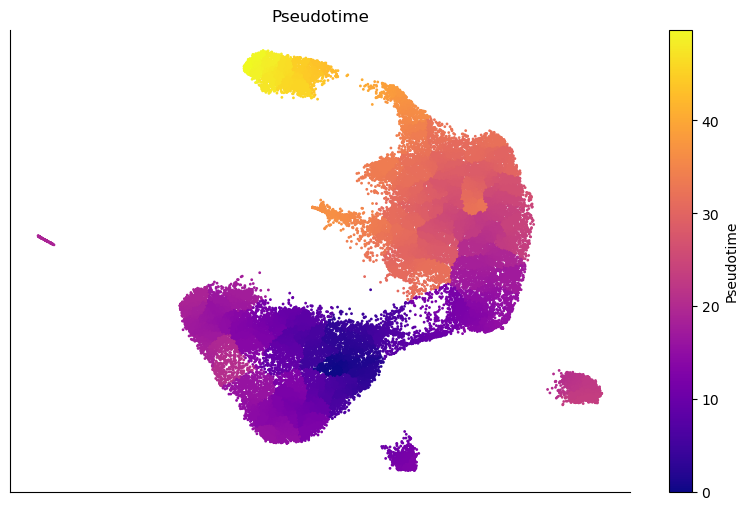

In [26]:
# Barcode de la célula raíz
barcode_to_find = 'TCGGGACAGGCGATAC-1_PT20'

# Verificar si el barcode está en la lista
if barcode_to_find in barcodes:
    # Encuentra el índice de la célula raíz de forma segura
    root_cell_index = barcodes.index(barcode_to_find)

    # Calcular pseudotiempo usando la célula raíz
    pseudotime = order_cells(
        umap, centroids,
        mst=mst,
        projected_points=projected_points,
        root_cells=root_cell_index,  # La raíz desde tu célula inicial
    )

    # Visualizar pseudotiempo
    plt.figure(1, (10, 6))
    plt.title("Pseudotime")
    plt.scatter(umap[:, 0], umap[:, 1], c=pseudotime, s=1, cmap="plasma")
    plt.xticks([])
    plt.yticks([])
    plt.colorbar(label='Pseudotime')
    plt.show()
else:
    print(f"Barcode '{barcode_to_find}' not found in barcodes list.")

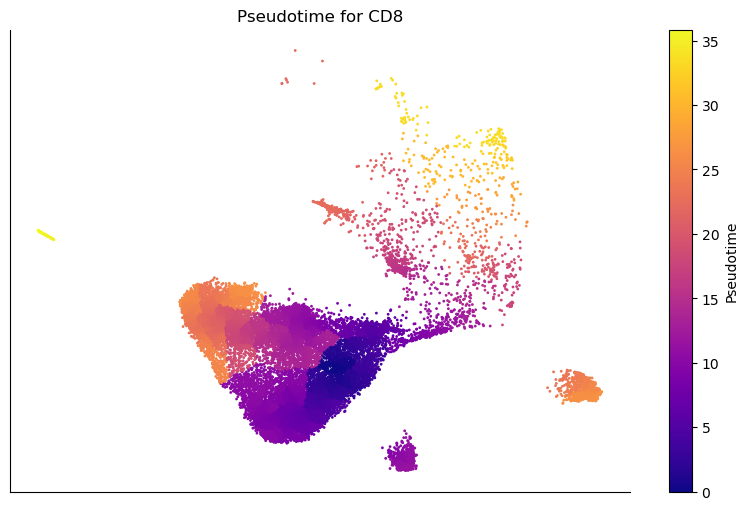

In [37]:
# Barcode de la célula raíz para CD8
barcode_cd8 = 'TCGGGACAGGCGATAC-1_PT20'

# Verificar si el barcode está en la lista de CD8
if barcode_cd8 in barcodes_cd8:
    # Encuentra el índice de la célula raíz de forma segura
    root_cell_index_cd8 = barcodes_cd8.index(barcode_cd8)

    # Aprender el grafo de trayectorias para CD8
    projected_points_cd8, mst_cd8, centroids_cd8 = learn_graph(matrix=umap_cd8, clusters=leiden_cd8)

    # Calcular pseudotiempo usando la célula raíz para CD8
    pseudotime_cd8 = order_cells(
        umap_cd8, centroids_cd8,
        mst=mst_cd8,
        projected_points=projected_points_cd8,
        root_cells=root_cell_index_cd8,  # La raíz desde tu célula inicial
    )

    # Visualizar pseudotiempo para CD8
    plt.figure(1, (10, 6))
    plt.title("Pseudotime for CD8")
    plt.scatter(umap_cd8[:, 0], umap_cd8[:, 1], c=pseudotime_cd8, s=1, cmap="plasma")
    plt.xticks([])
    plt.yticks([])
    plt.colorbar(label='Pseudotime')
    plt.show()
else:
    print(f"Barcode '{barcode_cd8}' not found in CD8 barcodes list.")

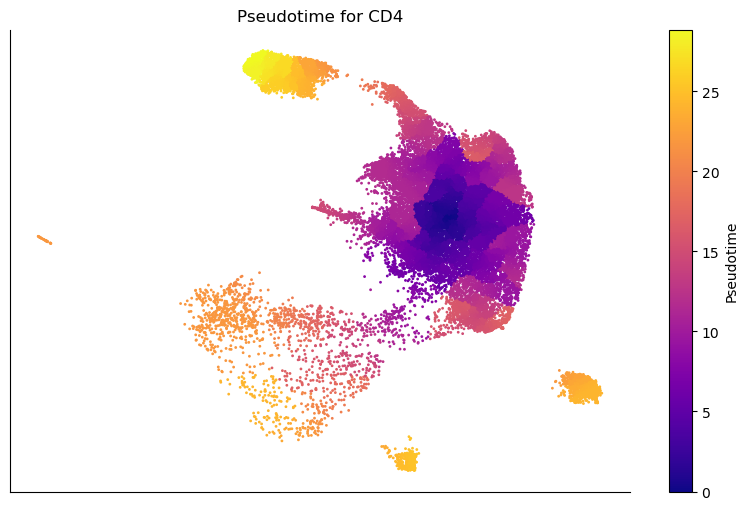

In [38]:
# Barcode de la célula raíz para CD4
barcode_cd4 = 'AACACGTCACCGGAAA-1_PT14'

# Verificar si el barcode está en la lista de CD4
if barcode_cd4 in barcodes_cd4:
    # Encuentra el índice de la célula raíz de forma segura
    root_cell_index_cd4 = barcodes_cd4.index(barcode_cd4)

    # Aprender el grafo de trayectorias para CD4
    projected_points_cd4, mst_cd4, centroids_cd4 = learn_graph(matrix=umap_cd4, clusters=leiden_cd4)

    # Calcular pseudotiempo usando la célula raíz para CD4
    pseudotime_cd4 = order_cells(
        umap_cd4, centroids_cd4,
        mst=mst_cd4,
        projected_points=projected_points_cd4,
        root_cells=root_cell_index_cd4,  # La raíz desde tu célula inicial
    )

    # Visualizar pseudotiempo para CD4
    plt.figure(2, (10, 6))
    plt.title("Pseudotime for CD4")
    plt.scatter(umap_cd4[:, 0], umap_cd4[:, 1], c=pseudotime_cd4, s=1, cmap="plasma")
    plt.xticks([])
    plt.yticks([])
    plt.colorbar(label='Pseudotime')
    plt.show()
else:
    print(f"Barcode '{barcode_cd4}' not found in CD4 barcodes list.")

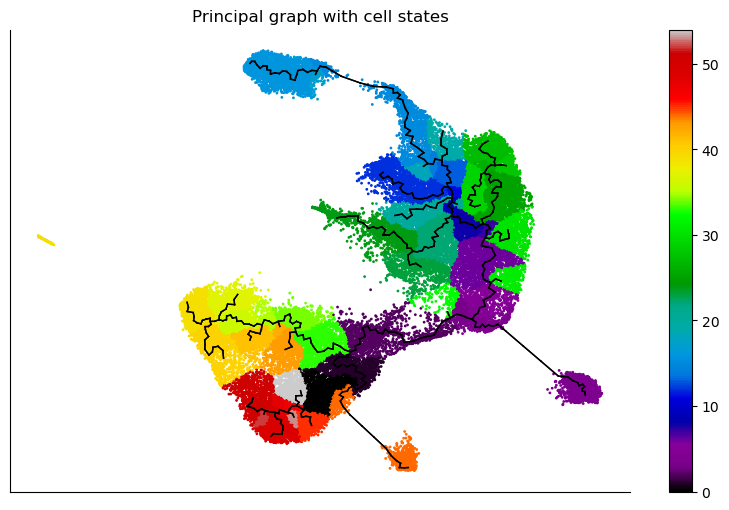

In [39]:
# Identificar estados celulares
cell_states, _ = compute_cell_states(umap, centroids, mst)

# Visualizar estados celulares
plt.figure(1, (10, 6))
plt.title("Principal graph with cell states")
plt.scatter(umap[:, 0], umap[:, 1], c=cell_states, s=1, cmap="nipy_spectral")
plt.colorbar()
edges = np.array(mst.nonzero()).T
for edge in edges:
    plt.plot(centroids[edge, 0], centroids[edge, 1], c="black", linewidth=1)
plt.xticks([])
plt.yticks([])
plt.show()

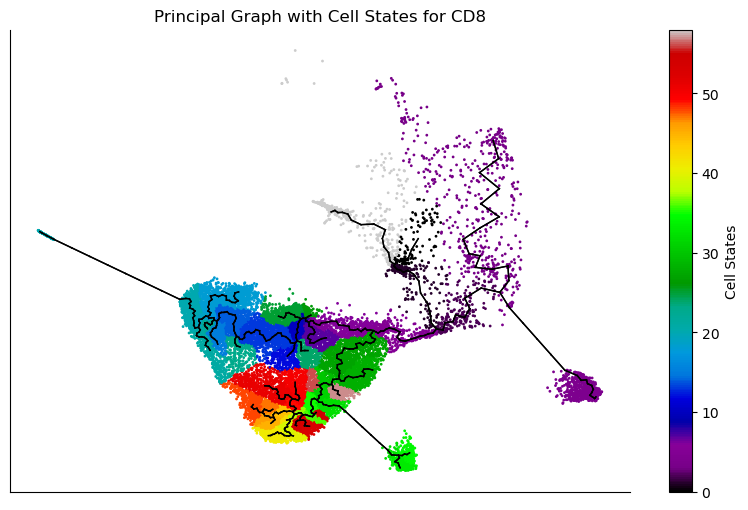

In [42]:
# Identificar estados celulares para CD8
cell_states_cd8, _ = compute_cell_states(umap_cd8, centroids_cd8, mst_cd8)

# Visualizar estados celulares para CD8
plt.figure(1, (10, 6))
plt.title("Principal Graph with Cell States for CD8")
plt.scatter(umap_cd8[:, 0], umap_cd8[:, 1], c=cell_states_cd8, s=1, cmap="nipy_spectral")
plt.colorbar(label='Cell States')

# Añadir aristas del grafo generado para CD8
edges_cd8 = np.array(mst_cd8.nonzero()).T
for edge in edges_cd8:
    plt.plot(centroids_cd8[edge, 0], centroids_cd8[edge, 1], c="black", linewidth=1)

plt.xticks([])
plt.yticks([])
plt.show()

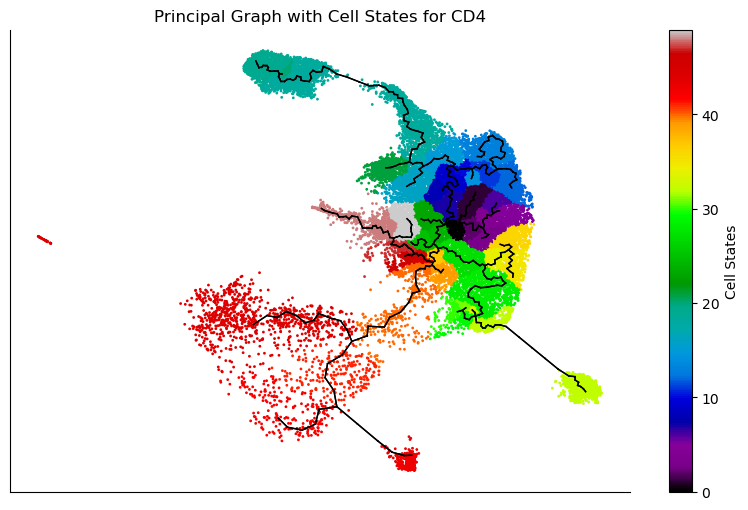

In [43]:
# Identificar estados celulares para CD4
cell_states_cd4, _ = compute_cell_states(umap_cd4, centroids_cd4, mst_cd4)

# Visualizar estados celulares para CD4
plt.figure(2, (10, 6))
plt.title("Principal Graph with Cell States for CD4")
plt.scatter(umap_cd4[:, 0], umap_cd4[:, 1], c=cell_states_cd4, s=1, cmap="nipy_spectral")
plt.colorbar(label='Cell States')

# Añadir aristas del grafo generado para CD4
edges_cd4 = np.array(mst_cd4.nonzero()).T
for edge in edges_cd4:
    plt.plot(centroids_cd4[edge, 0], centroids_cd4[edge, 1], c="black", linewidth=1)

plt.xticks([])
plt.yticks([])
plt.show()

/home/evercher/miniforge3/envs/palantir/lib/python3.10/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/home/evercher/miniforge3/envs/palantir/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)
/home/evercher/miniforge3/envs/palantir/lib/python3.10/site-packages/scanpy/metrics/_common.py:62: UserWarning: 75 variables were constant, will return nan for these.
  warnings.warn(


        Moran's I score  P-values  Adjusted P-values  Gene Indices
Genes                                                             
CD8A           0.703953       0.0                NaN          2407
NKG7           0.618630       0.0                NaN         15265
CD8B           0.612339       0.0                NaN          2408
IGFL2          0.593693       0.0                NaN         11692
FOXP3          0.584756       0.0                NaN         10217
CXCL13         0.580495       0.0                NaN          3460
CCL5           0.550821       0.0                NaN          2263
GNG4           0.495119       0.0                NaN         10674
GZMB           0.482999       0.0                NaN         11024
KLRK1          0.481105       0.0                NaN         12474


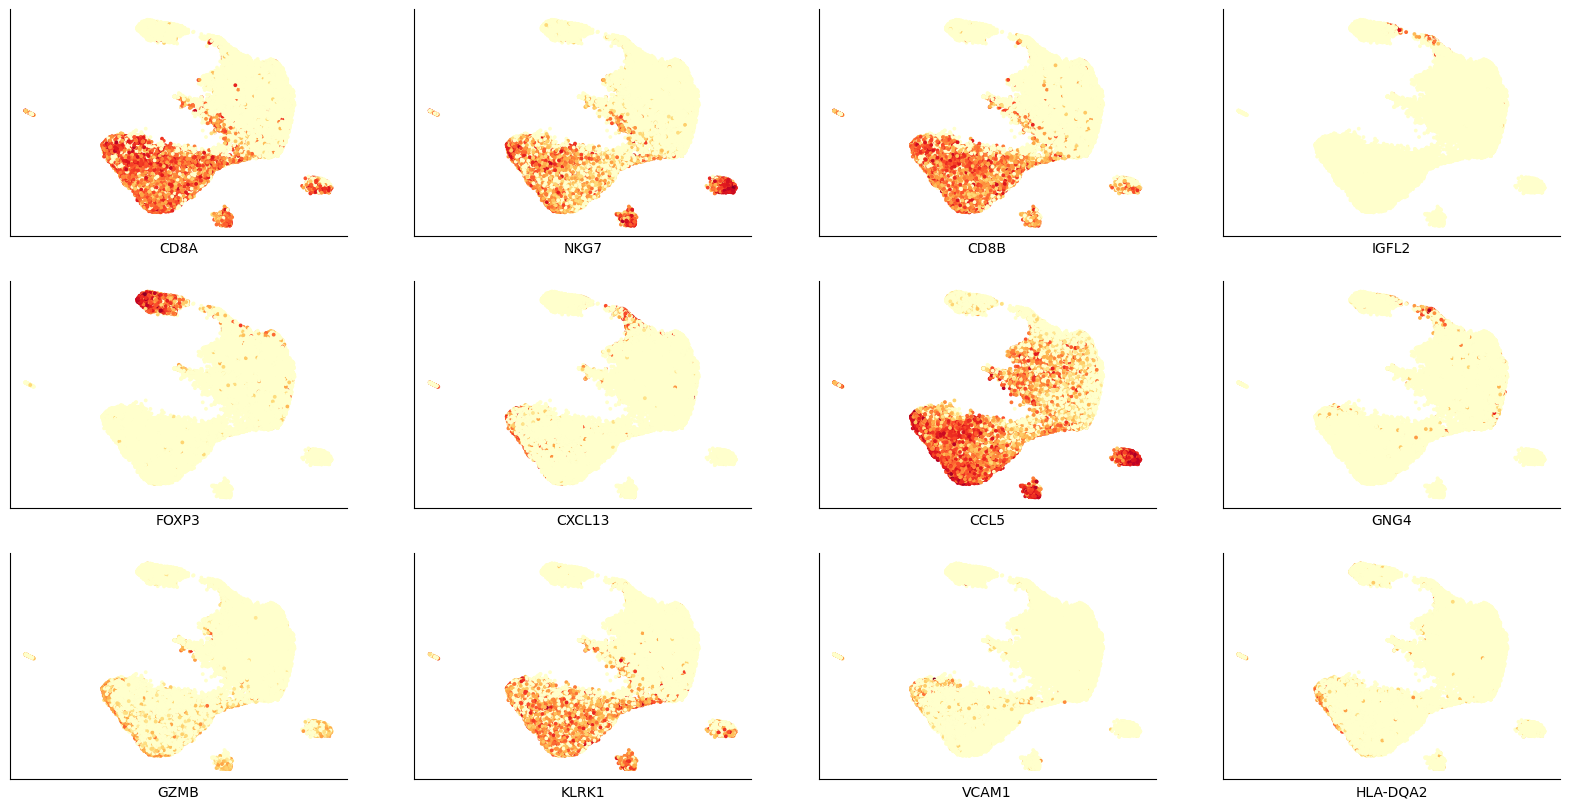

In [40]:
# Análisis de expresión diferencial
morans_i_scores, pvalues, adjusted_pvalues = differential_expression_genes(
    expression_matrix,
    projected_cells=projected_points,
)

# Crear un DataFrame con los resultados
morani_results = pd.DataFrame(
    {
        "Moran's I score": morans_i_scores,
        "P-values": np.round(pvalues, 4),
        "Adjusted P-values": np.round(adjusted_pvalues, 4),
        "Gene Indices": np.arange(len(morans_i_scores))
    },
    index=pd.Series(features, name="Genes"),
).sort_values("Moran's I score", ascending=False)

# Mostrar los 10 genes principales
print(morani_results.head(10))

# Visualizar genes diferencialmente expresados en UMAP
plt.figure(12, (20, 10))
for i, gene_idx in enumerate(morani_results["Gene Indices"].values[:12]):
    plt.subplot(3, 4, i + 1)
    plt.scatter(umap[:, 0], umap[:, 1], c=expression_matrix[:, gene_idx].toarray(), s=3, cmap="YlOrRd")
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(features[gene_idx])
plt.show()

/home/evercher/miniforge3/envs/palantir/lib/python3.10/site-packages/scanpy/metrics/_common.py:62: UserWarning: 653 variables were constant, will return nan for these.
  warnings.warn(


Top 10 genes for CD8:
          Moran's I score  P-values  Adjusted P-values  Gene Indices
Genes                                                               
RRM2             0.586425       0.0                NaN         18207
CXCL13           0.556095       0.0                NaN          3460
SPC25            0.537188       0.0                NaN         19595
DLGAP5           0.534946       0.0                NaN          3902
HLA-DQA2         0.508279       0.0                NaN         11330
GZMK             0.504851       0.0                NaN         11026
CA2              0.494451       0.0                NaN          1887
AURKB            0.486174       0.0                NaN          1255
VCAM1            0.479664       0.0                NaN         21993
UBE2C            0.474268       0.0                NaN         21681


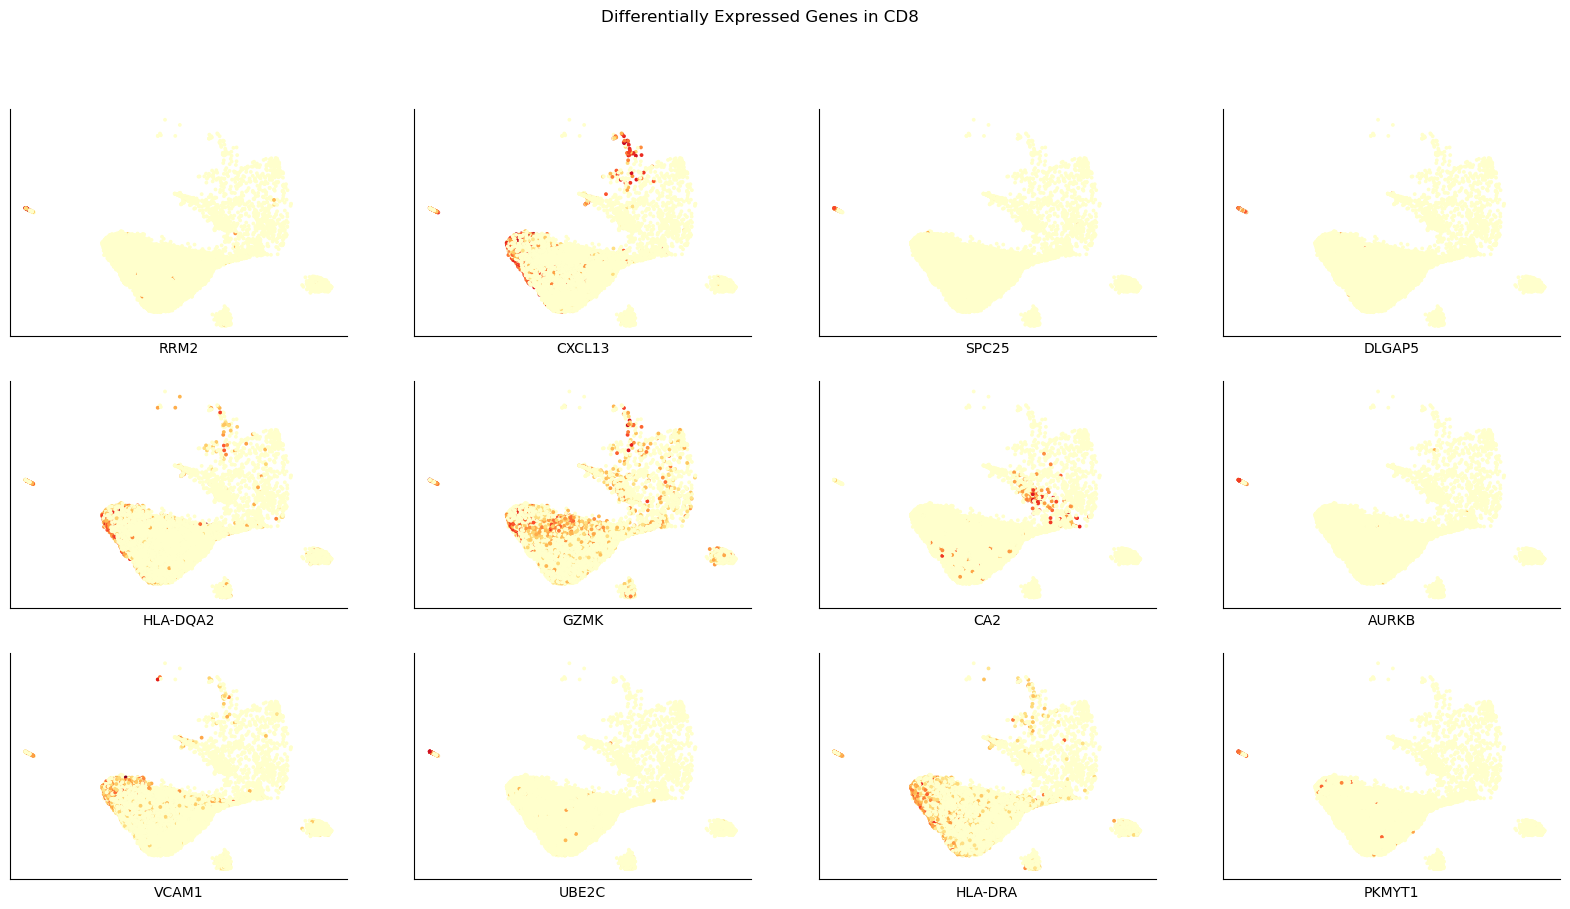

In [44]:
# Análisis de expresión diferencial para CD8
morans_i_scores_cd8, pvalues_cd8, adjusted_pvalues_cd8 = differential_expression_genes(
    expression_matrix_cd8,
    projected_cells=projected_points_cd8,
)

# Crear un DataFrame con los resultados para CD8
morani_results_cd8 = pd.DataFrame(
    {
        "Moran's I score": morans_i_scores_cd8,
        "P-values": np.round(pvalues_cd8, 4),
        "Adjusted P-values": np.round(adjusted_pvalues_cd8, 4),
        "Gene Indices": np.arange(len(morans_i_scores_cd8))
    },
    index=pd.Series(features_cd8, name="Genes"),
).sort_values("Moran's I score", ascending=False)

# Mostrar los 10 genes principales para CD8
print("Top 10 genes for CD8:")
print(morani_results_cd8.head(10))

# Visualizar genes diferencialmente expresados en UMAP para CD8
plt.figure(1, (20, 10))
for i, gene_idx in enumerate(morani_results_cd8["Gene Indices"].values[:12]):
    plt.subplot(3, 4, i + 1)
    plt.scatter(umap_cd8[:, 0], umap_cd8[:, 1], c=expression_matrix_cd8[:, gene_idx].toarray(), s=3, cmap="YlOrRd")
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(features_cd8[gene_idx])
plt.suptitle("Differentially Expressed Genes in CD8")
plt.show()

/home/evercher/miniforge3/envs/palantir/lib/python3.10/site-packages/scanpy/metrics/_common.py:62: UserWarning: 396 variables were constant, will return nan for these.
  warnings.warn(


Top 10 genes for CD4:
         Moran's I score  P-values  Adjusted P-values  Gene Indices
Genes                                                              
KLRC2           0.748050       0.0                NaN         12467
FOXP3           0.643575       0.0                NaN         10217
NKG7            0.581310       0.0                NaN         15265
TIGIT           0.576224       0.0                NaN         20508
CXCL13          0.560047       0.0                NaN          3460
TYROBP          0.534844       0.0                NaN         21643
KLRC3           0.506998       0.0                NaN         12468
IL1R2           0.497989       0.0                NaN         11803
KIR2DL3         0.484157       0.0                NaN         12377
GZMH            0.477989       0.0                NaN         11025


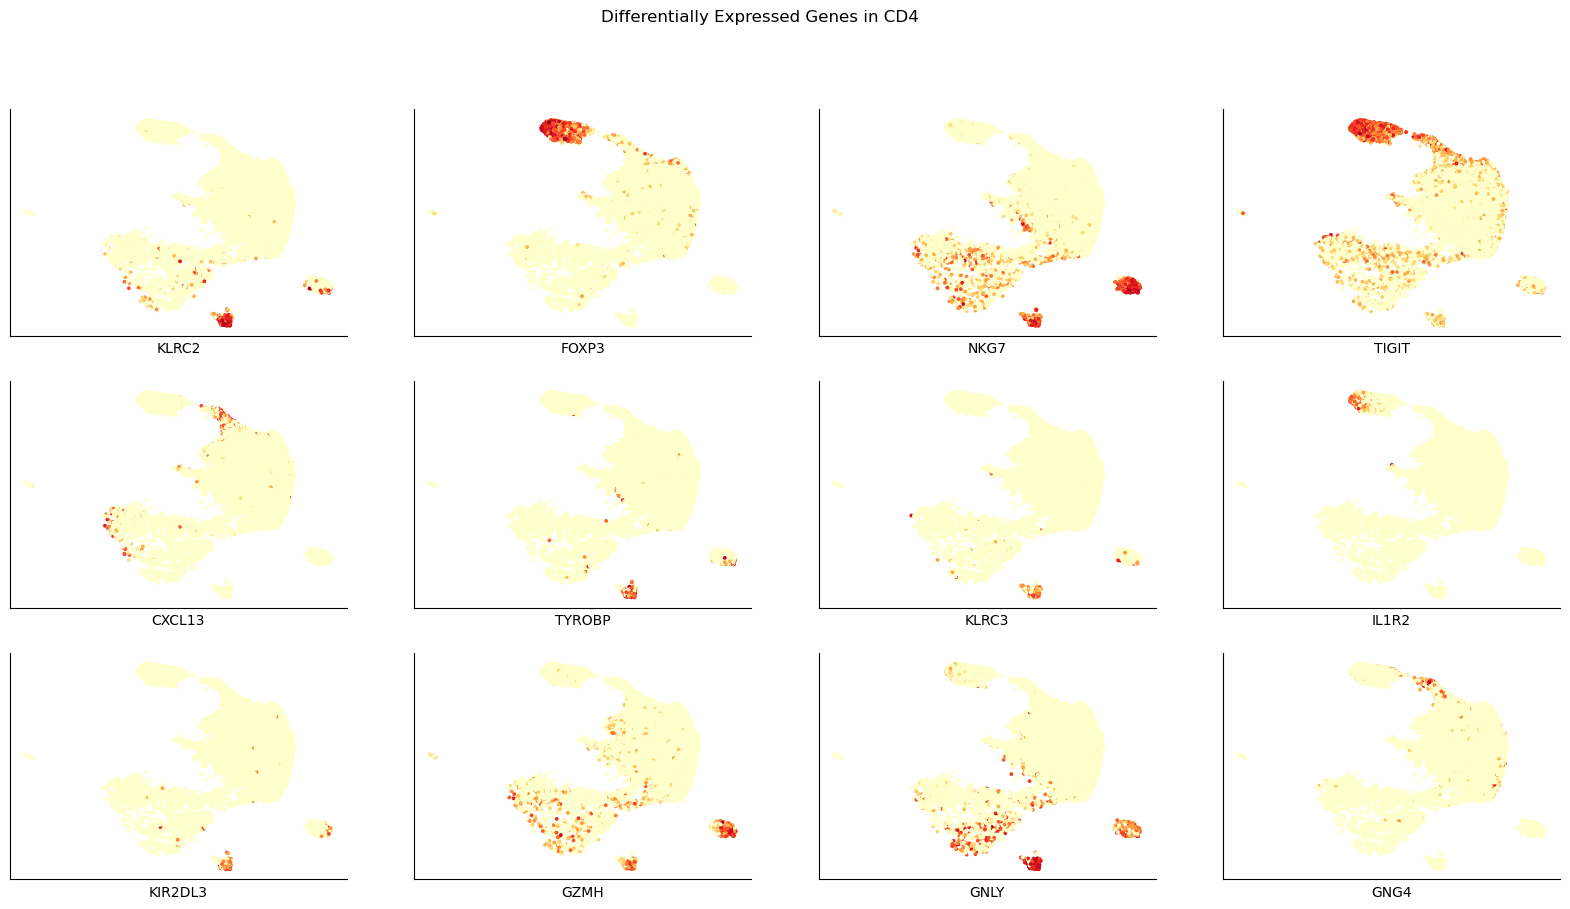

In [45]:
# Análisis de expresión diferencial para CD4
morans_i_scores_cd4, pvalues_cd4, adjusted_pvalues_cd4 = differential_expression_genes(
    expression_matrix_cd4,
    projected_cells=projected_points_cd4,
)

# Crear un DataFrame con los resultados para CD4
morani_results_cd4 = pd.DataFrame(
    {
        "Moran's I score": morans_i_scores_cd4,
        "P-values": np.round(pvalues_cd4, 4),
        "Adjusted P-values": np.round(adjusted_pvalues_cd4, 4),
        "Gene Indices": np.arange(len(morans_i_scores_cd4))
    },
    index=pd.Series(features_cd4, name="Genes"),
).sort_values("Moran's I score", ascending=False)

# Mostrar los 10 genes principales para CD4
print("Top 10 genes for CD4:")
print(morani_results_cd4.head(10))

# Visualizar genes diferencialmente expresados en UMAP para CD4
plt.figure(2, (20, 10))
for i, gene_idx in enumerate(morani_results_cd4["Gene Indices"].values[:12]):
    plt.subplot(3, 4, i + 1)
    plt.scatter(umap_cd4[:, 0], umap_cd4[:, 1], c=expression_matrix_cd4[:, gene_idx].toarray(), s=3, cmap="YlOrRd")
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(features_cd4[gene_idx])
plt.suptitle("Differentially Expressed Genes in CD4")
plt.show()

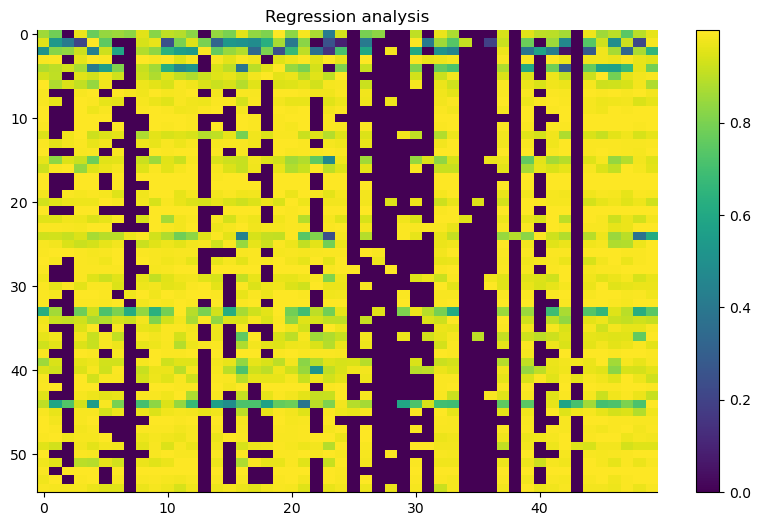

In [41]:
# # Selección aleatoria de genes para análisis de regresión
# np.random.seed(52)
# rand_gene_indices = np.random.permutation(len(features))[:50]
# subset_expression_matrix = expression_matrix.tocsc()[:, rand_gene_indices]

# # Realizar análisis de regresión
# pvals_matrix = regression_analysis(subset_expression_matrix, pseudotime, cell_states)
# n_states = len(np.unique(cell_states))

# # Visualizar matriz de p-valores
# plt.figure(2, (10, 6))
# plt.title("Regression analysis")
# plt.imshow(pvals_matrix, aspect='auto', cmap='viridis')
# plt.colorbar()
# plt.show()